## Import Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\dewor\OneDrive\Documents\Postgraduate\Exeter\Business Analytics\Term 3\Bussiness Project\Dataset\concatenated_1Ydata.csv')

In [5]:
df

,source,review content,score,appVersion
0,Google Play,"Love the app not the ads,not being able to see...",3,8.9.50.552
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552
3,Google Play,D.,3,NaN
4,Google Play,🥂👀🖤,5,NaN
...,...,...,...,...
545535,App Store,KILLNYOIRSELF DOE DOE DIENDIEJEE,1,NaN
545536,App Store,👽 👽,1,NaN
545537,App Store,No No,1,NaN
545538,App Store,No No,1,NaN


## Data Preprocessing

In [69]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dewor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dewor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dewor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dewor\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Missing Value in 'review content'

In [13]:
# Check for missing values in 'review content' column
missing_values = df['review content'].isnull()

In [15]:
# Display the rows with missing values
print("Rows with missing values in 'review content':")
print(df[missing_values])

Rows with missing values in 'review content':
             source review content  score   appVersion
26283   Google Play            NaN      5          NaN
44873   Google Play            NaN      5   8.9.38.494
109254  Google Play            NaN      5          NaN
146588  Google Play            NaN      1    8.9.8.545
149478  Google Play            NaN      1   8.5.63.941
153788  Google Play            NaN      3          NaN
159032  Google Play            NaN      5          NaN
217157  Google Play            NaN      5          NaN
268473  Google Play            NaN      1          NaN
319694  Google Play            NaN      5   8.8.80.599
376224  Google Play            NaN      1   8.8.74.652
381616  Google Play            NaN      5   8.8.74.652
432045  Google Play            NaN      4  8.6.64.1081
473165  Google Play            NaN      5   8.8.52.458


In [17]:
missing_values.value_counts()

review content
False    545526
True         14
Name: count, dtype: int64

In [19]:
# Drop rows with missing values in 'review content' column
df.dropna(subset=['review content'], inplace=True)
df['review content']

0         Love the app not the ads,not being able to see...
1         Can find great songs from every decade. Also a...
2               HIDDEN MUSIC STILL GETS PLAYED. Useless app
3                                                        D.
4                                                       🥂👀🖤
                                ...                        
545535                     KILLNYOIRSELF DOE DOE DIENDIEJEE
545536                                                  👽 👽
545537                                                No No
545538                                                No No
545539                                                Yo Yo
Name: review content, Length: 545526, dtype: object

In [21]:
df.shape

(545526, 4)

### Remove duplicates on 'review content'

In [23]:
# Remove duplicates based on 'review content'
df.drop_duplicates(subset='review content', inplace=True)

In [25]:
df

,source,review content,score,appVersion
0,Google Play,"Love the app not the ads,not being able to see...",3,8.9.50.552
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552
3,Google Play,D.,3,NaN
4,Google Play,🥂👀🖤,5,NaN
...,...,...,...,...
545532,App Store,Kys Kys,1,NaN
545535,App Store,KILLNYOIRSELF DOE DOE DIENDIEJEE,1,NaN
545536,App Store,👽 👽,1,NaN
545537,App Store,No No,1,NaN


### Remove short review

In [30]:
# Remove short reviews (e.g., less than 3 characters)
#data = data[data['review content'].str.len() > 2]

In [32]:
#data

,source,review content,score,appVersion
0,Google Play,"Love the app not the ads,not being able to see...",3,8.9.50.552
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552
4,Google Play,🥂👀🖤,5,NaN
5,Google Play,I love music. 🙂🙂🙂😄♾️,5,8.9.50.552
...,...,...,...,...
545532,App Store,Kys Kys,1,NaN
545535,App Store,KILLNYOIRSELF DOE DOE DIENDIEJEE,1,NaN
545536,App Store,👽 👽,1,NaN
545537,App Store,No No,1,NaN


### Using NLTK for Tokenization, Stopword Removal, Lemmatization, Validation

In [27]:
reviews = df['review content']

In [29]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back to a single string
    return ' '.join(words)

In [31]:
df['processed_review'] = reviews.apply(preprocess_text)

In [33]:
df['processed_review']

0         love app adsnot able see lyricsnot able mak ap...
1         find great song every decade also good selecti...
2                 hidden music still get played useless app
3                                                          
4                                                          
                                ...                        
545532                                                ky ky
545535                     killnyoirself doe doe diendiejee
545536                                                     
545537                                                     
545539                                                yo yo
Name: processed_review, Length: 414315, dtype: object

### Remove rows with empty strings or NaN in 'processed_review'

In [35]:
# Remove rows with empty strings or NaN in `processed_review`
df['processed_review'].replace('', pd.NA, inplace=True)  # Replace empty strings with NaN

In [37]:
df['processed_review']

0         love app adsnot able see lyricsnot able mak ap...
1         find great song every decade also good selecti...
2                 hidden music still get played useless app
3                                                      <NA>
4                                                      <NA>
                                ...                        
545532                                                ky ky
545535                     killnyoirself doe doe diendiejee
545536                                                 <NA>
545537                                                 <NA>
545539                                                yo yo
Name: processed_review, Length: 414315, dtype: object

In [39]:
df.dropna(subset=['processed_review'], inplace=True)    # Drop rows with NaN in `processed_review`

In [41]:
df

,source,review content,score,appVersion,processed_review
0,Google Play,"Love the app not the ads,not being able to see...",3,8.9.50.552,love app adsnot able see lyricsnot able mak ap...
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552,find great song every decade also good selecti...
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552,hidden music still get played useless app
5,Google Play,I love music. 🙂🙂🙂😄♾️,5,8.9.50.552,love music
6,Google Play,Love it 😀 😍,5,8.9.48.575,love
...,...,...,...,...,...
545516,App Store,Lol Bru,1,NaN,lol bru
545522,App Store,Mr . Hi,5,NaN,mr hi
545532,App Store,Kys Kys,1,NaN,ky ky
545535,App Store,KILLNYOIRSELF DOE DOE DIENDIEJEE,1,NaN,killnyoirself doe doe diendiejee


### Eliminate Meaningless words

In [43]:
# Define a function to check if a review is too short or meaningless
def is_meaningless(review):
    # Filter out reviews with less than 3 words
    return len(review.split()) < 3

In [45]:
# Apply the function and remove meaningless reviews
data = df[~df['processed_review'].apply(is_meaningless)]

In [47]:
data

,source,review content,score,appVersion,processed_review
0,Google Play,"Love the app not the ads,not being able to see...",3,8.9.50.552,love app adsnot able see lyricsnot able mak ap...
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552,find great song every decade also good selecti...
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552,hidden music still get played useless app
8,Google Play,Amazing app. Love listening to music on it on ...,5,8.9.50.552,amazing app love listening music daily
9,Google Play,Excellent great selection,5,8.9.50.552,excellent great selection
...,...,...,...,...,...
545496,App Store,Good G h,4,NaN,good g h
545497,App Store,GRRRR THIS WILL BE THE DEATH OF ME WHAT ARE TH...,1,NaN,grrrr death ad man
545498,App Store,… CMON SHAKE THAT MONKEY 😝😝,5,NaN,cmon shake monkey
545499,App Store,WHYY REMOVING LYRICS SHOULD GET YOU CANCELLED,1,NaN,whyy removing lyric get cancelled


In [49]:
# Drop rows with NaN in 'processed_review'
data.dropna(subset=['processed_review'], inplace=True)

C:\Users\dewor\AppData\Local\Temp\ipykernel_1320\1802127252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['processed_review'], inplace=True)


In [51]:
data

,source,review content,score,appVersion,processed_review
0,Google Play,"Love the app not the ads,not being able to see...",3,8.9.50.552,love app adsnot able see lyricsnot able mak ap...
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552,find great song every decade also good selecti...
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552,hidden music still get played useless app
8,Google Play,Amazing app. Love listening to music on it on ...,5,8.9.50.552,amazing app love listening music daily
9,Google Play,Excellent great selection,5,8.9.50.552,excellent great selection
...,...,...,...,...,...
545496,App Store,Good G h,4,NaN,good g h
545497,App Store,GRRRR THIS WILL BE THE DEATH OF ME WHAT ARE TH...,1,NaN,grrrr death ad man
545498,App Store,… CMON SHAKE THAT MONKEY 😝😝,5,NaN,cmon shake monkey
545499,App Store,WHYY REMOVING LYRICS SHOULD GET YOU CANCELLED,1,NaN,whyy removing lyric get cancelled


### Remove Gibberish

In [58]:
# Load a set of common English words
english_words = set(words.words())

In [60]:
# Define a function to identify gibberish reviews
def is_gibberish(review):
    words_list = review.split()
    gibberish_count = sum(1 for word in words_list if word not in english_words)
    # Consider a review gibberish if more than 40% of the words are not in the dictionary
    return gibberish_count > len(words_list) * 0.4

# Define a function to check if a review contains too many repeated sequences
def has_repeated_sequences(review):
    words_list = review.split()
    # Count the frequency of each word
    word_freq = pd.Series(words_list).value_counts()
    # Consider a review gibberish if any word repeats more than twice in a short review
    return any(word_freq > 2) and len(words_list) < 10

# Combine both checks
def is_gibberish_or_repeated(review):
    return is_gibberish(review) or has_repeated_sequences(review)

In [62]:
# Apply the function and remove gibberish or repeated sequence reviews
data = data[~data['processed_review'].apply(is_gibberish_or_repeated)]

In [64]:
data

,source,review content,score,appVersion,processed_review
1,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552,find great song every decade also good selecti...
2,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552,hidden music still get played useless app
8,Google Play,Amazing app. Love listening to music on it on ...,5,8.9.50.552,amazing app love listening music daily
9,Google Play,Excellent great selection,5,8.9.50.552,excellent great selection
10,Google Play,All the reviewers have same problem just add👎t...,1,8.9.50.552,reviewer problem addthat sit dont explain anyo...
...,...,...,...,...,...
545484,App Store,Good NO MORE ADDS PLEAAAAAAAAASE,2,NaN,good add pleaaaaaaaaase
545496,App Store,Good G h,4,NaN,good g h
545497,App Store,GRRRR THIS WILL BE THE DEATH OF ME WHAT ARE TH...,1,NaN,grrrr death ad man
545498,App Store,… CMON SHAKE THAT MONKEY 😝😝,5,NaN,cmon shake monkey


## Visualisation

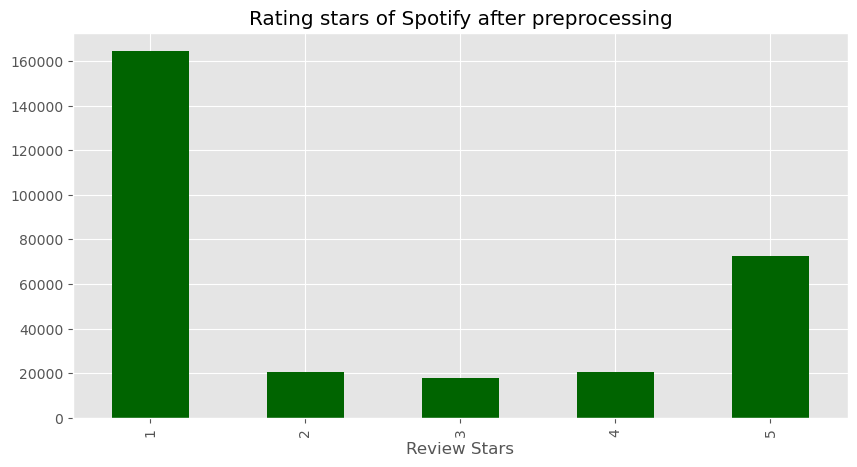

In [71]:
ax = data['score'].value_counts().sort_index().plot(kind='bar', title = 'Rating stars of Spotify after preprocessing', figsize = (10,5), color = 'darkgreen')
ax.set_xlabel('Review Stars')
plt.show()

In [77]:
data['score'].value_counts().sort_index()

score
1    164450
2     20370
3     17958
4     20570
5     72405
Name: count, dtype: int64

In [75]:
data['score'].mean()

2.3782311591091214

## Export Data

In [80]:
data.to_csv(r'C:\Users\dewor\OneDrive\Documents\Postgraduate\Exeter\Business Analytics\Term 3\Bussiness Project\Dataset/data_preprocessing_spotify.csv', index=False)